# Machine Learning Engineer Nanodegree
## Capstone Project
Carina Thobe, 01.05.2017

### Objective
The aim is to classify whether a transaction is fraud or not. Therefore I am going to apply different supervised learning methods and compare the results to each other in order to find out which one performs best.

### Dataset
The data for the analysis are credit card transactions generated by European credit cardholders. The dataset has 284,807 transactions with 492 cases of fraud, which is only 0.172% of all transactions. 

The variables of the dataset are all transformed by a PCA transformation and unfortunately there is no meta data that explains the meaning of the variables (due to confidentiality). There are 2 variables that are not transformed: “time” and “amount”, whereas the latter is the amount of the transaction and the first is the time between each transaction and the first transaction in seconds. The variable “Class” is the response variable (1=fraud, 0=no fraud). 

The dataset was released by a research collaboration of Worldline and the Machine Learning Group of the University of Bruxelles (ULB) (Caelen, Dal Pozzolo, Johnson, & Bontempi, 2015) and it can be downloaded here:  https://www.kaggle.com/dalpozz/creditcardfraud 


### Project Design
First of all I am going to do exploratory data analysis to get to know the data and develop a feeling for the variables:

- Find out if all input variables are filled, are there missing values and what to do with them
- Find out if there are outliers, if there are I will decide whether I should eliminate them or should keep them because they are relevant (E.g. in case of “amount” this could be an indicator for fraud)
- Do feature selection or eliminiation (sklearn.feature_selection) and find out if there are some variables that have no explanatory value and that can be deleted
- Find out whether I should normalize “amount” and “time”

Second I am going to divide the dataset into a training and test set. I will start with 80% training and 20% testing data. For the training data I will try to do resample the set, which means I will take all fraud cases of the training set und just a portion of the non-fraud cases (“undersampling”). If that seems to be a bad idea I will just use the stratify parameter in train_test_split and assure that I do not worsen the imbalances.

Third I am going to implement the chosen models:
- Logistic Regression (this will be the benchmark model)
- Decision Tree
- Random Forest
- SVM 

Then I will compare the evaluation metrics defined above of the models to the benchmark model and draw a conclusion.


## Exploratory Data Analysis

In [65]:
import numpy as np
import pandas as pd
from IPython.display import display 
%matplotlib inline
import matplotlib.pyplot as plt 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [66]:
# Loading the dataset
data = pd.read_csv("creditcard.csv")

# Display the first lines
display(data.head(n=5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [67]:
type(data)

pandas.core.frame.DataFrame

Since the variables are transformed by a PCA and no metadata was given, it is not possible to interpret the meanings.

In [68]:
# Get to know the classes
n_records = len(data)
n_fraud = sum(data['Class']==1)
n_nonfraud = sum(data['Class']==0)
fraud_percent = float(n_fraud )/float(n_records)*100
nonfraud_percent = float(n_nonfraud )/float(n_records)*100

# Print the results
print ("Number of records: {:,}".format(n_records))
print ("Fraud cases: {:,}".format(n_fraud))
print ("Non fraud cases: {:,}".format(n_nonfraud))
print ("Percentage of fraud: {:.3f}%".format(fraud_percent))
print ("Percentage of nonfraud: {:.3f}%".format(nonfraud_percent))

Number of records: 284,807
Fraud cases: 492
Non fraud cases: 284,315
Percentage of fraud: 0.173%
Percentage of nonfraud: 99.827%


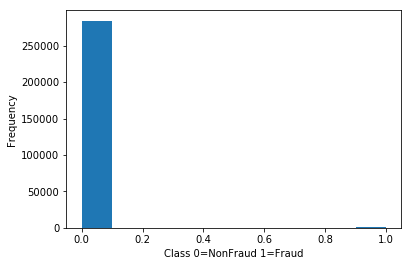

In [69]:
# class in a graph
time = plt.hist(data['Class'])
plt.xlabel('Class 0=NonFraud 1=Fraud')
plt.ylabel('Frequency')
plt.show()

This just visualizes what I have caculated above, there is only 0,17% of fraud in the dataset

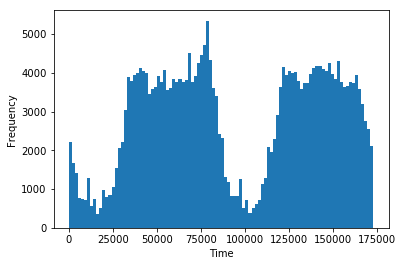

In [108]:
# explore variable time
time = plt.hist(data['Time'], bins=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

The variable time represents the time in seconds for each transaction from the first transaction. We could calculate day 1 and day 2 from that. But since it won't bring much analytical value we could also eliminate it from the dataset.

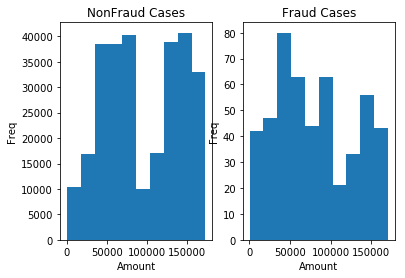

In [71]:
# look at fraud data and time
fraud_data = data[data["Class"]==1]
nonfraud_data = data[data["Class"]==0]
plt.subplot(121)
plot1 = plt.hist(nonfraud_data['Time'])
plt.title("NonFraud Cases")
plt.xlabel("Amount")
plt.ylabel("Freq")
plt.subplot(122)
plot2 = plt.hist(fraud_data['Time'])
plt.title("Fraud Cases")
plt.xlabel("Amount")
plt.ylabel("Freq")

In [ ]:
This looks similar.

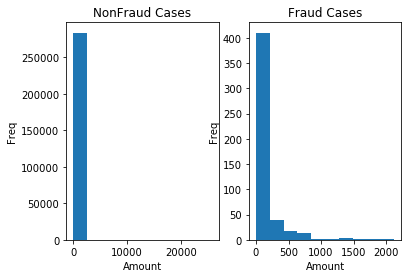

In [9]:
# Look at Fraud and Amount
plt.subplot(121)
plot1 = plt.hist(nonfraud_data['Amount'])
plt.title("NonFraud Cases")
plt.xlabel("Amount")
plt.ylabel("Freq")
plt.subplot(122)
plot2 = plt.hist(fraud_data['Amount'])
plt.title("Fraud Cases")
plt.xlabel("Amount")
plt.ylabel("Freq")

Cant see much on this graph, lets have a closer look by restricting the value of amount. 

Max amount of fraud data: 2,125.87
Max amount of nonfraud data: 25,691.16


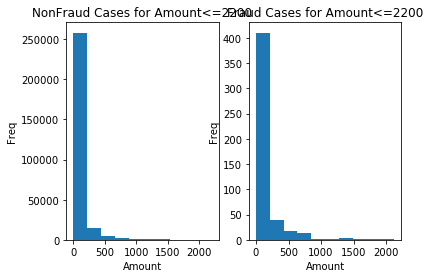

In [10]:
# have a closer look on amount and fraud
max_amount = max(fraud_data["Amount"])
print ("Max amount of fraud data: {:,}".format(max_amount))
max_amount_non = max(nonfraud_data["Amount"])
print ("Max amount of nonfraud data: {:,}".format(max_amount_non))
plt.subplot(121)
plot2 = plt.hist(nonfraud_data[nonfraud_data["Amount"]<=2200]['Amount'], bins = 10)
plt.title("NonFraud Cases for Amount<=2200")
plt.xlabel("Amount")
plt.ylabel("Freq")
plt.subplot(122)
plot2 = plt.hist(fraud_data[fraud_data["Amount"]<=2200]['Amount'], bins = 10)
plt.title("Fraud Cases for Amount<=2200")
plt.xlabel("Amount")
plt.ylabel("Freq")

Fraud data has a maximum amount of 2,125 and normal data has a maximum amount of 25,691. After limiting the graph to 2,200 it is possible to see that both variables are similar distributed for amount.


### Statistics

In [23]:
#df=pd.DataFrame(data)
data.describe(percentiles=[.25, .5, .75, .99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
99%,170560.940,2.237,3.802,2.728,4.248,3.425,4.200,2.696,2.076,2.987,...,1.932,1.530,1.509,1.064,1.204,1.159,0.931,0.541,1017.970,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


In [18]:
# for the middle variables which arent displayed above
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_mitte=[data['V10'], data['V11'], data['V12'], data['V13'], data['V14'], data['V15'], data['V16'], data['V17'], data['V18'], data['V19'], data['V20']]
data_mittedf=pd.DataFrame(np.transpose(data_mitte))
data_mittedf.describe(percentiles=[.25, .5, .75, .99])

,0,1,2,3,4,5,6,7,8,9,10
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
std,1.089,1.021,0.999,0.995,0.959,0.915,0.876,0.849,0.838,0.814,0.771
min,-24.588,-4.797,-18.684,-5.792,-19.214,-4.499,-14.130,-25.163,-9.499,-7.214,-54.498
25%,-0.535,-0.762,-0.406,-0.649,-0.426,-0.583,-0.468,-0.484,-0.499,-0.456,-0.212
50%,-0.093,-0.033,0.140,-0.014,0.051,0.048,0.066,-0.066,-0.004,0.004,-0.062
75%,0.454,0.740,0.618,0.663,0.493,0.649,0.523,0.400,0.501,0.459,0.133
99%,3.254,2.291,1.699,2.514,2.150,1.926,1.875,2.290,2.069,2.263,2.412
max,23.745,12.019,7.848,7.127,10.527,8.878,17.315,9.254,5.041,5.592,39.421


With looking at the line "count" I can see that all variables have 284,807 values, which is also the number of records and means that there are no missing values.
Variables V1 to V28 are already normalized which can be seen by looking at mean, which is 0 for all variables, and standard deviation. They are the result of a principal component analysis and should not be transformed again.

The variables Time and Amount are not standardized. Since 'time' represents the seconds between the first transaction in the dataset and each transaction it has not much analytical value and can therefore be eliminated. The variable Amount has a mean of 88 and the maximum is for the fraud data different than for the non fraud data. Therefore it could be useful to normalize the amount variable since this has not been done before.

## Some Graphs

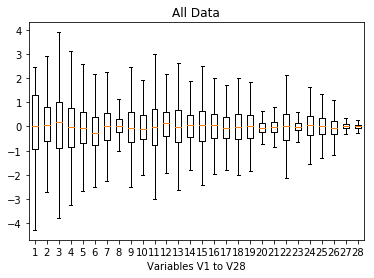

In [72]:
input5=[data['V1'], data['V2'], data['V3'], data['V4'], data['V5'], data['V6'], data['V7'], data['V8'], data['V9'], data['V10'], data['V11'], data['V12'], data['V13'], data['V14'], data['V15'], data['V16'], data['V17'], data['V18'], data['V19'], data['V20'], data['V21'], data['V22'], data['V23'], data['V24'], data['V25'], data['V26'], data['V27'], data['V28']]
plt.boxplot(input5,0,'')
plt.title("All Data")
plt.xlabel("Variables V1 to V28")

To get a graphical overview I plotted all 28 variables as boxplots into one graph. Even though the data is already transformed by a PCA there is still a lot of variance between the variables. For example variables 27 and 28 have a small variance and variable 3 has a big variance, which can be seen when looking at the size of the box and the range of the whiskers. For variable 27 and 28 the box is very short, the upper and lower quartile are quite close to each other and the whiskers are not too far apart. For variable 3 the box is much taller, which means that upper and lower quartile (which include 50% of the data) are far apart as well as the whiskers. The median (the middle line of the box) is for all variables very close to zero. 

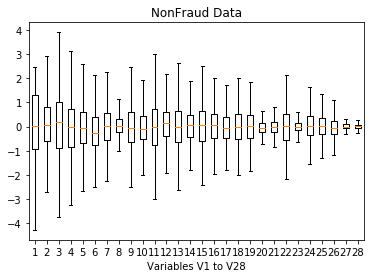

In [12]:
input5_nonfraud=[nonfraud_data['V1'], nonfraud_data['V2'], nonfraud_data['V3'], nonfraud_data['V4'], nonfraud_data['V5'], nonfraud_data['V6'], nonfraud_data['V7'], nonfraud_data['V8'], nonfraud_data['V9'], nonfraud_data['V10'], nonfraud_data['V11'], nonfraud_data['V12'], nonfraud_data['V13'], nonfraud_data['V14'], nonfraud_data['V15'], nonfraud_data['V16'], nonfraud_data['V17'], nonfraud_data['V18'], nonfraud_data['V19'], nonfraud_data['V20'], nonfraud_data['V21'], nonfraud_data['V22'], nonfraud_data['V23'], nonfraud_data['V24'], nonfraud_data['V25'], nonfraud_data['V26'], nonfraud_data['V27'], nonfraud_data['V28']]
input5_onlyfraud=[fraud_data['V1'], fraud_data['V2'], fraud_data['V3'], fraud_data['V4'], fraud_data['V5'], fraud_data['V6'], fraud_data['V7'], fraud_data['V8'], fraud_data['V9'], fraud_data['V10'], fraud_data['V11'], fraud_data['V12'], fraud_data['V13'], fraud_data['V14'], fraud_data['V15'], fraud_data['V16'], fraud_data['V17'], fraud_data['V18'], fraud_data['V19'], fraud_data['V20'], fraud_data['V21'], fraud_data['V22'], fraud_data['V23'], fraud_data['V24'], fraud_data['V25'], fraud_data['V26'], fraud_data['V27'], fraud_data['V28']]
plt.boxplot(input5_nonfraud,0,'')
plt.title("NonFraud Data")
plt.xlabel("Variables V1 to V28")

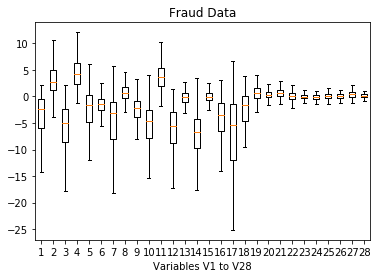

In [13]:
plt.boxplot(input5_onlyfraud,0,'')
plt.xlabel("Variables V1 to V28")
plt.title("Fraud Data")
plt.show()

When looking at the boxplots splitted for fraud and non fraud data, you can see that the boxplots for fraud data are quite different, they show a different mean and different variance. This is probably due to the fact that the fraud data is only 492 cases, which results in statistics (such as mean/median/quartals) that are more sensible to the influence of outliers or higher/lower extreme values.

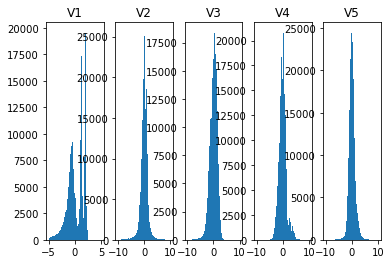

In [65]:
# More plots
plt.subplot(151)
plot1 = plt.hist(data['V1'], bins=100, range=[-5,5])
plt.title("V1")
plt.subplot(152)
plot2 = plt.hist(data['V2'], bins=100, range=[-10,10])
plt.title("V2")
plt.subplot(153)
plot1 = plt.hist(data['V3'], bins=100, range=[-10,10])
plt.title("V3")
plt.subplot(154)
plot2 = plt.hist(data['V4'], bins=100, range=[-10,10])
plt.title("V4")
plt.subplot(155)
plot2 = plt.hist(data['V5'], bins=100, range=[-10,10])
plt.title("V5")

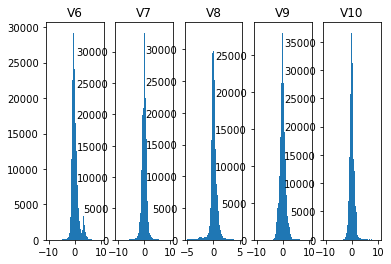

In [15]:
# V6 to V10
plt.subplot(151)
plot1 = plt.hist(data['V6'], bins=100, range=[-10,10])
plt.title("V6")
plt.subplot(152)
plot2 = plt.hist(data['V7'], bins=100, range=[-10,10])
plt.title("V7")
plt.subplot(153)
plot1 = plt.hist(data['V8'], bins=100, range=[-5,5])
plt.title("V8")
plt.subplot(154)
plot2 = plt.hist(data['V9'], bins=100, range=[-10,10])
plt.title("V9")
plt.subplot(155)
plot2 = plt.hist(data['V10'], bins=100, range=[-10,10])
plt.title("V10")

Those graphs visualize what we saw already when looking at the boxplots and at the statistics. Therefore I'm not going to plot all variables.

## Data Preprocessing
### Transform Amount

In [73]:
# Transform Amount
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler()
#data['Amount_Transf'] = scaler.fit_transform(data['Amount'])
#let's try StandardScaler:
data['Amount_Transf']= StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
     
#display(data.head(n = 100))
#df=pd.DataFrame(data)
#df.describe(percentiles=[.25, .5, .75, .99])

#remove columns
df_transf = data.drop(['Time','Amount'],axis = 1, inplace=False)

C:\Users\Carina\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [74]:
df_transf.describe(percentiles=[.25, .5, .75, .999])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Transf
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.002,0.000
std,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,1.089,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,0.042,1.000
min,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,-0.353
25%,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,0.000,-0.331
50%,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,0.000,-0.265
75%,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,0.000,-0.045
99.9%,2.345,7.852,3.387,6.236,8.075,6.165,7.973,6.135,5.961,9.135,...,7.879,2.260,4.760,1.247,1.874,2.251,2.607,2.096,1.000,11.641
max,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,23.745,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,1.000,102.362


In [75]:
#remove class variable. only independent variables should be in data now
df_transf = df_transf.drop(['Class'],axis = 1, inplace=False)

### Outlier Handling

In [76]:
# set the values above 99.9 to the 99.9 value
for i in df_transf.columns:
    #print(i)
    threshold = None
    threshold = df_transf[i].quantile(.999)
    set_outliers = np.ceil(threshold)
    df_transf.loc[df_transf[i] > threshold, i] = set_outliers

In [77]:
# new
df_transf.describe(percentiles = [.10, .25, .5, .75, .90, .99, .999])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Transf
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,0.001,-0.002,0.000,-0.001,-0.003,-0.002,-0.005,-0.001,-0.001,-0.001,...,-0.003,-0.004,-0.000,-0.003,-0.000,-0.000,0.000,-0.001,-0.002,-0.006
std,1.960,1.639,1.517,1.407,1.347,1.312,1.158,1.182,1.092,1.080,...,0.732,0.674,0.724,0.584,0.604,0.519,0.485,0.388,0.279,0.864
min,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,...,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,-0.353
10%,-1.893,-1.360,-1.803,-1.656,-1.302,-1.167,-1.078,-0.459,-1.294,-1.032,...,-0.390,-0.367,-0.867,-0.329,-0.870,-0.606,-0.548,-0.211,-0.156,-0.349
25%,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,...,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,-0.331
50%,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,...,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,-0.265
75%,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,...,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,-0.045
90%,2.015,1.327,1.676,1.483,1.408,1.509,1.039,0.769,1.302,1.120,...,0.445,0.376,0.915,0.339,0.705,0.601,0.689,0.265,0.180,0.458
99%,2.237,3.802,2.728,4.248,3.425,4.200,2.696,2.076,2.987,3.254,...,2.412,1.932,1.530,1.509,1.064,1.204,1.159,0.931,0.541,3.717


In [112]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_transf, data["Class"], test_size = 0.3, random_state = 0)

print ("Training set has {} observations.".format(X_train.shape[0]))
print ("Testing set has {} observations.".format(X_test.shape[0]))
print ("")
print ("Fraud cases Training: {:,}".format(sum(y_train)))
print ("Fraud cases Test: {:,}".format(sum(y_test)))

Training set has 199364 observations.
Testing set has 85443 observations.

Fraud cases Training: 345
Fraud cases Test: 147


In [113]:
##Use RandomUnderSampler
##to get a balanced sample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)

In [114]:
## check result of undersampling
X_resampled_df = pd.DataFrame(X_resampled)
X_resampled_df.describe(percentiles=[.25,.5,.75,.99])

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,...,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,-2.617,1.605,-3.540,2.115,-1.648,-0.679,-2.829,0.026,-1.232,-2.784,...,0.164,0.270,-0.058,-0.024,-0.032,0.026,0.026,0.049,0.053,0.061
std,5.800,2.836,6.399,2.805,4.450,1.829,6.116,4.960,2.452,4.624,...,1.142,2.102,1.169,1.273,0.553,0.666,0.484,1.092,0.433,0.904
min,-30.552,-14.235,-31.104,-3.898,-22.106,-6.406,-43.557,-41.044,-13.434,-24.588,...,-13.390,-22.798,-8.887,-19.254,-2.028,-4.782,-1.324,-7.263,-3.127,-0.353
25%,-2.914,-0.057,-5.257,-0.115,-1.691,-1.595,-3.106,-0.217,-2.257,-4.546,...,-0.187,-0.144,-0.546,-0.247,-0.380,-0.298,-0.289,-0.066,-0.058,-0.348
50%,-0.957,0.991,-1.340,1.382,-0.340,-0.657,-0.588,0.170,-0.688,-0.925,...,0.026,0.157,0.005,-0.037,0.014,0.037,-0.010,0.054,0.035,-0.274
75%,0.912,2.841,0.397,4.262,0.510,0.070,0.255,0.905,0.259,0.013,...,0.419,0.702,0.566,0.202,0.380,0.395,0.322,0.468,0.233,0.047
99%,2.113,8.000,2.752,7.000,4.389,5.760,2.512,7.000,3.058,4.246,...,3.809,8.000,3.000,5.000,1.009,1.703,1.117,2.173,1.142,4.571
max,2.237,8.000,3.188,7.000,9.000,7.000,8.000,7.000,6.000,10.000,...,6.000,8.000,3.000,5.000,1.057,2.000,3.000,3.000,3.000,7.715


In [128]:
## check undersampling
n_records_res = len(X_resampled_df)
n_fraud_res = sum(y_resampled)
n_nonfraud_res = n_records_res-sum(y_resampled)
print ("Number of records Training: {:,}".format(n_records_res))
print ("Fraud cases in Training Data: {:,}".format(n_fraud_res))
print ("Non fraud cases: {:,}".format(n_nonfraud_res))

print ("Percentage of fraud: {:.3f}%".format(n_fraud_res/n_records_res))
print ("Percentage of nonfraud: {:.3f}%".format(n_nonfraud_res/n_records_res))

print("")
print("Test Data: {:,}".format(len(X_test)))
print("Fraud cases in Test Data: {:,}".format(sum(y_test)))


Number of records Training: 690
Fraud cases in Training Data: 345
Non fraud cases: 345
Percentage of fraud: 0.500%
Percentage of nonfraud: 0.500%

Test Data: 85,443
Fraud cases in Test Data: 147


In [116]:
from sklearn import metrics

def performance_metric(y_test, y_predict):
    """ Calculates area under the precision recall curve 
        and recall. """

    # area under the precision recall curvee
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_predict)
    auc_pr = metrics.auc(recall, precision)
    
    # recall= True Positive / (True Positive + False Negative)
    matrix= metrics.confusion_matrix(y_test,y_predict)
    recall = matrix[1,1]/(matrix[1,1]+matrix[1,0])
        
    print("Confusion Matrix")
    print (matrix)
    print ("")
    print ("False negative: {}".format(matrix[1,0]))
    print ("False positive: {}".format(matrix[0,1]))
    print ("")
    print ("Area under the precision recall curve: {:.3f}".format(auc_pr))
    print ("Recall: {:.3f}".format(recall))
    
def auc_pr_curve(y_test, y_predict):
    """ Calculates area under the precision recall curve 
        and recall. """
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_predict)
    auc_pr = metrics.auc(recall, precision)    
    return auc_pr

def recall(y_test, y_predict):
    """ Calculates area under the precision recall curve 
        and recall. """
    matrix= metrics.confusion_matrix(y_test,y_predict)
    recall = matrix[1,1]/(matrix[1,1]+matrix[1,0]) 
    return recall

###  Logistic Regression as Benchmark Model

In [117]:
from sklearn.linear_model import LogisticRegression

clf_reg1 = LogisticRegression(random_state=0)
clf_reg1 = clf_reg1.fit(X_resampled, y_resampled)

predicted_reg = clf_reg1.predict(X_test)

print("Performance of Prediction by Logistic Regression")
performance_metric(y_test,predicted_reg)

Performance of Prediction by Logistic Regression
Confusion Matrix
[[83030  2266]
 [   15   132]]

False negative: 15
False positive: 2266

Area under the precision recall curve: 0.477
Recall: 0.898


So there are 15 false negatives of 147 data points in the testing set, which is not too good. The model was trained on the sampled data and now it was tested on the unsampled data, which contains the real percentage of fraud. Thereby too many False Positives were generated. This is a sign that otherwise the model is close to overfitting.  Recall is 0.898 and the area under the precision recall curve is 0.477, which is going to be the benchmark for the following models. 

## SVC

In [151]:
from sklearn.svm import SVC

clf_svc = SVC(random_state=0)
clf_svc.fit(X_resampled, y_resampled)
svc_predicted = clf_svc.predict(X_test)

print("Performance of Prediction by SVC")
performance_metric(y_test,svc_predicted )

Performance of Prediction by SVC
Confusion Matrix
[[81347  3949]
 [   11   136]]

False negative: 11
False positive: 3949

Area under the precision recall curve: 0.479
Recall: 0.925


The SVC reaches a better value for the area under the precision recall curve, which is still very low with 0.479 and the number of false positives even higher than before. Recall is very good with 0.925 and also the number of false negatives decreased.

## Decision Tree

In [131]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier(random_state=852)
clf_tree.fit(X_resampled, y_resampled)
tree_predicted = clf_tree.predict(X_test)

print("Performance of Prediction by Decision Tree")
performance_metric(y_test,tree_predicted )


Performance of Prediction by Decision Tree
Confusion Matrix
[[78017  7279]
 [   17   130]]

False negative: 17
False positive: 7279

Area under the precision recall curve: 0.451
Recall: 0.884


The Decision tree has more false negatives than the two models before and a lot more of false positives. So the area under the precision recall curve and recall are worse than for the benchmark model.


## Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

clf_rf= RandomForestClassifier()
clf_rf.fit(X_resampled, y_resampled)

rf_predicted = clf_rf.predict(X_test)

print("Performance of Prediction by Random Forest Classifier")
performance_metric(y_test,rf_predicted )

Confusion Matrix
[[83245  2051]
 [   14   133]]

False negative: 14
False positive: 2051

Area under the precision recall curve: 0.483
Recall: 0.905


This model is the best right now, compared to the other ones.

## Check with all Data

Let's check the best model with all data, as it could be in real life (even though we used this data also for training...)

In [157]:
X_all = data.drop(['Time','Amount','Class'],axis = 1, inplace=False)
y_all = data['Class']

In [162]:
alldata_rf_predictions = clf_rf.predict(X_all)
print ("Performance of Random Forest Classifier when tested with whole (unbalanced) dataset")
performance_metric(y_all,alldata_rf_predictions)

Performance of Random Forest Classifier when tested with whole (unbalanced) dataset
Confusion Matrix
[[277314   7001]
 [    17    475]]

False negative: 17
False positive: 7001

Area under the precision recall curve: 0.515
Recall: 0.965


Area under the precision recall curve improves a bit, but way too many fales positives!

## Smote

Let's try oversampling. 

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
##data preparation was already done:
df_transf.describe()
#data["Class"] # y_labels from before

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Transf
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,0.001,-0.002,0.000,-0.001,-0.003,-0.002,-0.005,-0.001,-0.001,-0.001,...,-0.003,-0.004,-0.000,-0.003,-0.000,-0.000,0.000,-0.001,-0.002,-0.006
std,1.960,1.639,1.517,1.407,1.347,1.312,1.158,1.182,1.092,1.080,...,0.732,0.674,0.724,0.584,0.604,0.519,0.485,0.388,0.279,0.864
min,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,-24.588,...,-54.498,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,-0.353
25%,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,-0.535,...,-0.212,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,-0.331
50%,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,-0.093,...,-0.062,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,-0.265
75%,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,0.454,...,0.133,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,-0.045
max,3.000,8.000,4.000,7.000,9.000,7.000,8.000,7.000,6.000,10.000,...,6.000,8.000,3.000,5.000,2.000,2.000,3.000,3.000,3.000,12.000


In [163]:
# Train Test Split as usual
X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(df_transf, data["Class"], test_size = 0.3, random_state = 0)
columns = df_transf.columns
X_train_all = pd.DataFrame(data=X_train_all,columns=columns )
X_test_all = pd.DataFrame(data=X_test_all,columns=columns )
y_test_all= pd.DataFrame(data=y_test_all,columns=["Class"])
y_train_all= pd.DataFrame(data=y_train_all,columns=["Class"])

In [176]:
print ("Training set has {:,} samples.".format(X_train_all.shape[0]))
print ("Testing set has {:,} samples.".format(X_test_all.shape[0]))
print("")
print ("Fraud cases Training: {:,}".format(len(y_train_all[y_train_all["Class"]==1])))
print ("Fraud cases Test: {:,}".format(len(y_test_all[y_test_all["Class"]==1])))

Training set has 199,364 samples.
Testing set has 85,443 samples.

Fraud cases Training: 345
Fraud cases Test: 147


In [165]:
# Oversampling using smote
X_over_smote, y_over_smote = smote.fit_sample(X_train_all,y_train_all)
X_over_smote = pd.DataFrame(data=X_over_smote,columns=columns )
y_over_smote = pd.DataFrame(data=y_over_smote,columns=["Class"])
# we can Check the numbers of our data
print("samples by oversampling: {:,}".format(len(X_over_smote)))
print("oversampled data non-fraud cases: {:,}".format(len(y_over_smote[y_over_smote["Class"]==0])))
print("oversampled data fraud cases: {:,}".format(len(y_over_smote[y_over_smote["Class"]==1])))
print("non fraud in % {:3,}".format(len(y_over_smote[y_over_smote["Class"]==0])/len(X_over_smote)))
print("fraud in % {:3,}".format(len(y_over_smote[y_over_smote["Class"]==1])/len(X_over_smote)))


C:\Users\Carina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


samples by oversampling: 398,038
oversampled data non-fraud cases: 199,019
oversampled data fraud cases: 199,019
non fraud in % 0.5
fraud in % 0.5


### Logistic Regression with oversampled data

In [166]:
clf_reg_smote = LogisticRegression(random_state=0)
clf_reg_smote = clf_reg_smote.fit(X_over_smote, y_over_smote)

predicted_reg_smote = clf_reg_smote.predict(X_test_all)

performance_metric(y_test_all,predicted_reg_smote)


C:\Users\Carina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix
[[83140  2156]
 [   12   135]]

False negative: 12
False positive: 2156

Area under the precision recall curve: 0.489
Recall: 0.918


This is not bad. Similar result as with undersampling data

In [148]:
# Check with all data
predicted_reg_smote_alldata = clf_reg_smote.predict(X_all)
performance_metric(y_all,predicted_reg_smote_alldata)

Confusion Matrix
[[276877   7438]
 [    41    451]]

False negative: 41
False positive: 7438

Area under the precision recall curve: 0.487
Recall: 0.917


## SVC oversampling

Running time was too long, with regard to the business backround I dismissed this one.

## Decision Tree

In [169]:
from sklearn import tree

clf_tree_smote = tree.DecisionTreeClassifier(random_state=5)
clf_tree_smote.fit(X_over_smote, y_over_smote)
tree_predicted_smote = clf_tree_smote.predict(X_test_all)

print("Performance of Prediction by Decision Tree with oversampling")
performance_metric(y_test_all,tree_predicted_smote)

Performance of Prediction by Decision Tree with oversampling
Confusion Matrix
[[85125   171]
 [   32   115]]

False negative: 32
False positive: 171

Area under the precision recall curve: 0.592
Recall: 0.782


## Random Forest

In [171]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

clf_rf_smote = RandomForestClassifier(random_state=546)
clf_rf_smote = clf_rf_smote.fit(X_over_smote, y_over_smote)

predicted_rf_smote = clf_rf_smote.predict(X_test_all)
performance_metric(y_test_all,predicted_rf_smote)

C:\Users\Carina\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Confusion Matrix
[[85284    12]
 [   27   120]]

False negative: 27
False positive: 12

Area under the precision recall curve: 0.863
Recall: 0.816


In [168]:
alldata_rf_predictions = clf_rf_smote.predict(X_all)
print (performance_metric(y_all,alldata_rf_predictions))

Confusion Matrix
[[284299     16]
 [    28    464]]

False negative: 28
False positive: 16

Area under the precision recall curve: 0.955
Recall: 0.943
None


In [183]:
clf_rf_smote.feature_importances_

array([ 0.01192574,  0.00875946,  0.01973302,  0.11896646,  0.00623071,
        0.00510238,  0.011602  ,  0.0120611 ,  0.0545623 ,  0.02255619,
        0.27192001,  0.1537228 ,  0.00906112,  0.12499636,  0.00524214,
        0.0096296 ,  0.03236752,  0.01677205,  0.00939044,  0.00873358,
        0.04131107,  0.00542488,  0.00406921,  0.00422451,  0.00566536,
        0.00562079,  0.00522845,  0.00673454,  0.00838619])

This model has a good recall and a good value for the area under the precision recall curve. Also it has the best portion of false negatives and false positives. Therefore this is my final model!

### Plot Tree
Please Note: 
This is not my visualization code. It's from Aysen Tatarinov and can be looked up here:
 https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html

In [196]:
from sklearn.tree import _tree
def leaf_depths(tree, node_id = 0):
     '''
     from Aysen Tatarinov https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
     '''
     '''
     tree.children_left and tree.children_right store ids
     of left and right chidren of a given node
     '''
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     '''
     If a given node is terminal, 
     both left and right children are set to _tree.TREE_LEAF
     '''
     if left_child == _tree.TREE_LEAF:
         
         '''
         Set depth of terminal nodes to 0
         '''
         depths = np.array([0])

     else:
         
         '''
         Get depths of left and right children and
         increment them by 1
         '''
         left_depths = leaf_depths(tree, left_child) + 1
         right_depths = leaf_depths(tree, right_child) + 1
 
         depths = np.append(left_depths, right_depths)
 
     return depths

In [197]:
def draw_ensemble(ensemble):
     '''
     from Aysen Tatarinov https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
     '''
        
     plt.figure(figsize=(8,8))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='#ddaaff', 
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='#9933ff', 
              bins=range(min(depths_all), max(depths_all)+1), 
              weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")
    
     samples_all = np.array([], dtype=int)
    
     plt.subplot(212)
    
     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='#aaddff', 
                  bins=range(min(samples), max(samples)+1))
    
     plt.hist(samples_all, histtype='step', color='#3399ff', 
              bins=range(min(samples_all), max(samples_all)+1), 
              weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")
    
     plt.show()

In [198]:
def leaf_samples(tree, node_id = 0):
     '''
     from Aysen Tatarinov https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
     '''
        
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

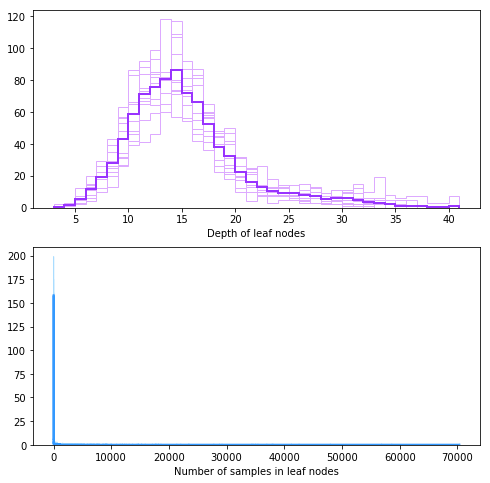

In [199]:
draw_ensemble(clf_rf_smote)